In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/kmean_dataset.csv")
dataset.head()

In [ ]:
X = dataset.to_numpy()

In [ ]:
def init_centroids(X , k):
  np.random.seed(0)
  centroid_indices = np.random.permutation(k)
  centroids = X[centroid_indices]
  return centroids

In [ ]:
def assign_labels(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
    c_labels = np.argmin(distances, axis=1)
    return c_labels

In [ ]:
def cluster_mean(X, labels , k):
  centroids = np.zeros((k,X.shape[1]))
  for i in range(k):
    centroids[i] = np.mean(X[ labels ==  i] , axis = 0)
  return centroids

In [ ]:
def compute_cost(X, labels, centroids):
    cost = np.sqrt(np.sum((X - centroids[labels])**2))
    return cost / X.shape[0]


In [ ]:
def kmeans(X, k,max_iters , print_iters = False):
    centroids = init_centroids(X, k)
    Cost = []

    for i in range(max_iters):
        prev_centroids = centroids
        labels = assign_labels(X, centroids)
        centroids = cluster_mean(X, labels, k)
        cost = compute_cost(X , labels ,centroids)
        Cost.append(cost)
        if print_iters  == True :
         print(f"Iteration {i + 1} : Cost = {cost}")
        if np.sqrt(np.sum((centroids - prev_centroids)**2)) == 0 :
            break
    return centroids, labels , Cost

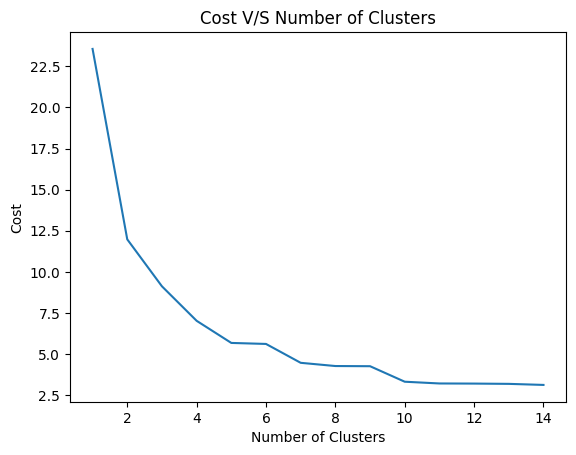

In [ ]:
cost_history = np.zeros(14,)

for k in range(1, 15):
    centroids, labels, Cost = kmeans(X, k, 150,print_iters = False)
    cost_history[k-1] = Cost[-1]

plt.plot(range(1, 15), cost_history)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Cost V/S Number of Clusters')
plt.show()


In [ ]:
k = 6
max_iters = 150
centroids, labels ,Cost = kmeans(X, k=k, max_iters = max_iters , print_iters = True)

Iteration 1 : Cost = 10.01974903240492
Iteration 2 : Cost = 8.330765220067923
Iteration 3 : Cost = 7.474873870563177
Iteration 4 : Cost = 6.8716501578265055
Iteration 5 : Cost = 6.265850685732691
Iteration 6 : Cost = 5.973105938126898
Iteration 7 : Cost = 5.800276899227289
Iteration 8 : Cost = 5.7404242658494695
Iteration 9 : Cost = 5.654319046362669
Iteration 10 : Cost = 5.6318471459062724
Iteration 11 : Cost = 5.617212138559549
Iteration 12 : Cost = 5.610471613859508
Iteration 13 : Cost = 5.610471613859508


Text(0.5, 1.0, 'Cost vs No. Of Iterations(K = 6)')

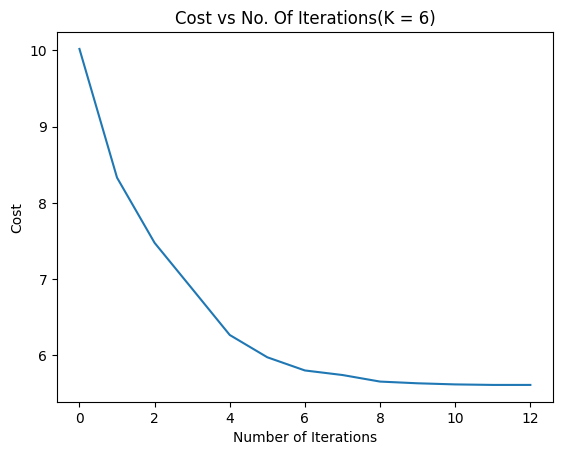

In [ ]:
plt.plot(Cost)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Cost vs No. Of Iterations(K = 6)")